# Chapter 10 - Introduction to Artificial Neural Networks

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os, itertools

In [3]:
from sklearn import datasets

ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as 
* classifying billions of images (e.g., Google Images)
* powering speech recognition services (e.g., Apple’s Siri)
* recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube)
* learning to beat the world champion at the game of Go by examining millions of past games and then playing against itself (DeepMind’s AlphaGo).

### From Biological to Artificial Neurons

There are a few good reasons to believe that this one is different and will have a much more profound impact on our lives:

* There is now a **huge quantity of data available** to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.

* The tremendous **increase in computing power** since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s Law, but also thanks to the gaming industry, which has produced powerful GPU cards by the millions.

* The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.

* Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).

* ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress, and even more amazing products.

### Logical Computations with Neurons

Artificial Neuron: 
    
it has one or more binary (on/off) inputs and one binary output.

The artificial neuron simply activates its output *when more than a certain number of its inputs are active*. 

McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that computes *any logical proposition you want*. 

For example, let’s build a few ANNs that perform various logical computations (see Figure 10-3), assuming that **a neuron is activated when at least two of its inputs are active**.

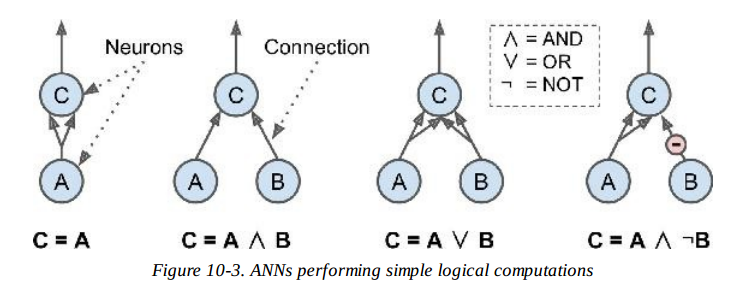

## The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. 

It is based on a slightly different artificial neuron (see Figure 10-4) called a **linear threshold unit (LTU)**: 
the inputs and output are now numbers (instead of binary on/off values) and each input connection is associated with a **weight**. 

The LTU computes a weighted sum of its inputs ($z = w_1 x_1 + w_2 x_2 + + w_n x_n= w^T · x$), then applies a **step function** to that sum and outputs the result: $h_w(x) = step (z) = step (w^T · x)$.

The most common step function used in Perceptrons is the **Heaviside step** function (see Equation 10-1).

Sometimes the **sign function** is used instead.


A *single LTU* can be used for simple **linear binary classification**. 

It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM). 


For example, you could use a single LTU to classify iris flowers based on the petal length and width (also adding an extra bias feature x0 = 1). 


**Training an LTU** means finding the right values for w0, w1, and w2.


A Perceptron is simply composed of **a single layer of LTUs**, with each neuron connected to all the inputs.

These connections are often represented using special passthrough neurons called **input neurons**: 

They just output whatever input they are fed. 

Moreover, an extra **bias** feature is generally added (x0 = 1). 

This bias feature is typically represented using a special type of neuron called a **bias neuron**, which just outputs 1 all the time.

A Perceptron with *two inputs* and *three outputs* is represented in Figure 10-5. This Perceptron can classify instances simultaneously into **three different binary classes**, which makes it a multioutput classifier.

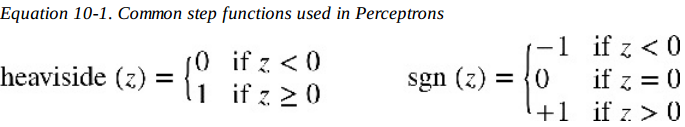

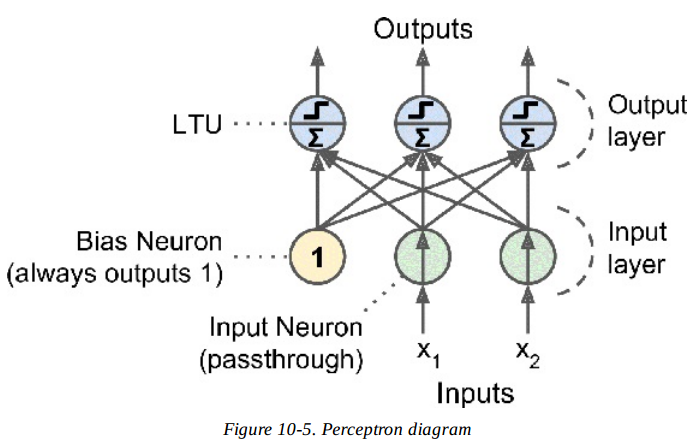

So how is a Perceptron trained? 

The Perceptron training algorithm proposed by Frank Rosenblatt was largely inspired by *Hebb’s rule*. 

In his book *"The Organization of Behavior"*, published in 1949, Donald Hebb suggested that when a **biological neuron often triggers another neuron**, the connection between these two neurons **grows stronger**. 

This idea was later summarized by Siegrid Löwel in this catchy phrase:

“Cells that fire together, wire together.” 

This rule later became known as *Hebb’s rule (or Hebbian learning)*: 

The connection weight between two neurons is increased whenever they have the same output. 

Perceptrons are trained using a variant of this rule that takes into account **the error made by the network**; 

it does not reinforce connections that lead to the wrong output.

The Perceptron is fed one training instance at a time, and for each instance it makes its predictions. 

For every output neuron that produced a wrong prediction, it **reinforces the connection weights** from the inputs that would have contributed to the correct prediction. 

The rule is shown in Equation 10-2.

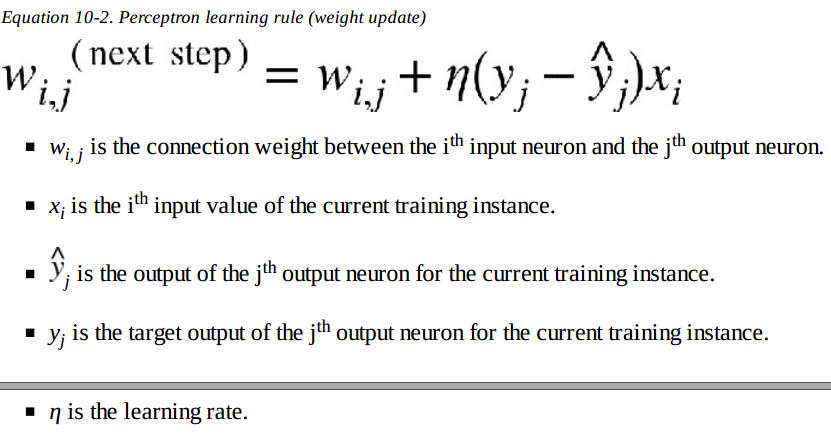

The decision boundary of *each output neuron is **linear** *, so Perceptrons are incapable of learning complex
patterns (just like Logistic Regression classifiers). However, **if the training instances are linearly
separable, Rosenblatt demonstrated that this algorithm would converge to a solution**. 

This is called the **Perceptron convergence theorem**.


Scikit-Learn provides a Perceptron class that implements a single LTU network. It can be used pretty much as you would expect — for example, on the iris dataset:

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. 

In fact, Scikit-Learn’s Perceptron class is equivalent to using an `SGDClassifier` with the following hyperparameters: * `loss="perceptron"`
* `learning_rate="constant"`
* `eta0=1` (the learning rate)
* `penalty=None` (no regularization).

Note that contrary to Logistic Regression classifiers, **Perceptrons do not output a class probability**; rather, they just make predictions based on a hard threshold. 

This is one of the good reasons to *prefer Logistic Regression over Perceptrons*.

In their 1969 monograph titled Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of *serious weaknesses of Perceptrons*, in particular the fact that **they are incapable of solving some trivial
problems** (e.g., the Exclusive OR (XOR) classification problem; see the left side of Figure 10-6). 

Of course this is true of *any other linear classification model* as well (such as Logistic Regression classifiers), but researchers had expected much more from Perceptrons, and their disappointment was great: as a result, many researchers dropped connectionism altogether (i.e., the study of neural networks) in favor of higher-level problems such as logic, problem solving, and search.

However, it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a **Multi-Layer Perceptron (MLP)**. 

In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right of Figure 10-6, for each combination of inputs: with inputs (0, 0) or (1, 1) the network outputs 0, and with
inputs (0, 1) or (1, 0) it outputs 1.

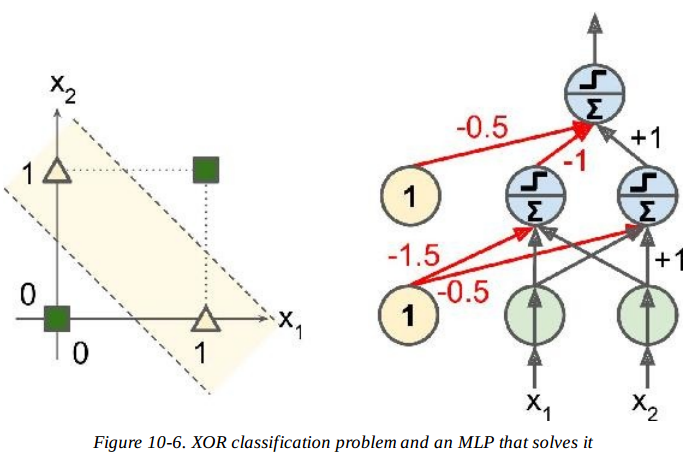

## Multi-Layer Perceptron and Backpropagation

An MLP is composed:

* one (passthrough) input layer

* one or more layers of LTUs, called hidden layers

* one final layer of LTUs called the output layer (see Figure 10-7). 

Every layer except the *output layer* includes a bias neuron and is fully connected to the next layer. When an ANN has *two or more hidden layers*, it is called a **deep neural network (DNN)**.

For many years researchers struggled to find a way to train MLPs, without success. 

But in 1986, D. E. Rumelhart et al. published a groundbreaking article introducing the backpropagation training algorithm.

Today we would describe it as **Gradient Descent using reverse-mode autodiff**.

For each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer (this is the forward pass, just like when making predictions). 

Then it measures the network’s *output error* (i.e., the difference between the desired output and the actual output of the network), and it computes **how much each neuron in the last hidden layer contributed to each output neuron’s error**. 

It then proceeds to measure how much of these error contributions came from each neuron in the previous hidden layer — and so on until the algorithm reaches the input layer. 

This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward in the network (hence the name of the algorithm). 

If you check out the reversemode autodiff algorithm in Appendix D, you will find that the forward and reverse passes of
backpropagation simply perform reverse-mode autodiff. 

The last step of the backpropagation algorithm is a **Gradient Descent step on all the connection weights in the network, using the error gradients measured earlier**.

Let’s make this even shorter: 

1. for each training instance the backpropagation algorithm first makes a prediction (forward pass)

2. measures the error

3. goes through each layer in reverse to measure the error contribution from each connection (reverse pass)

4. finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorithm to work properly, the authors made a key change to the MLP’s architecture: they
replaced the *step function* with the **logistic function**, $σ(z) = 1 / (1 + exp(–z))$. 

This was essential because the step function contains only flat segments, so there is *no gradient* to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a **well-defined nonzero derivative**
everywhere, allowing Gradient Descent to make some progress at every step. 


The backpropagation algorithm may be used with other activation functions, instead of the logistic function. Two other popular activation functions are:

The hyperbolic tangent function $tanh (z) = 2σ(2z) – 1$

Just like the logistic function it is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function), which tends to make each layer’s output more or less **normalized** (i.e., centered around 0) at the beginning of training. 

This often helps speed up convergence.

The ReLU function $ReLU (z) = max (0, z)$. 

It is continuous but unfortunately **not differentiable at $z = 0$** (the slope changes abruptly, which can make Gradient Descent bounce around). 

In practice it works very well and has the advantage of being fast to compute. Most importantly, the fact that **it does not have a maximum output** value also helps reduce some issues during Gradient Descent.

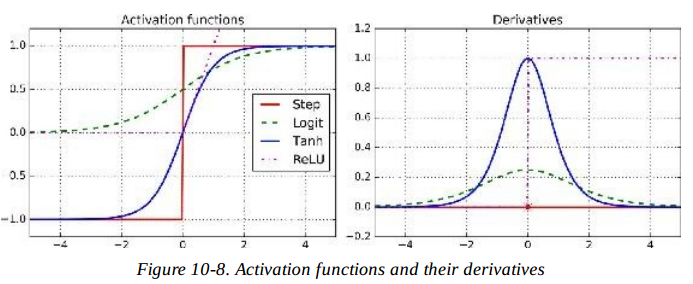

An MLP is often used for classification, with each output corresponding to a different binary class (e.g., spam/ham, urgent/not-urgent, and so on). 

When the classes are exclusive (e.g., classes 0 through 9 for digit image classification), the output layer is typically modified by replacing the individual activation functions by a **shared softmax function** (see Figure 10-9). 

The output of each neuron corresponds to the estimated **probability of the corresponding class**.


Note that the signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a **feedforward neural network (FNN).**

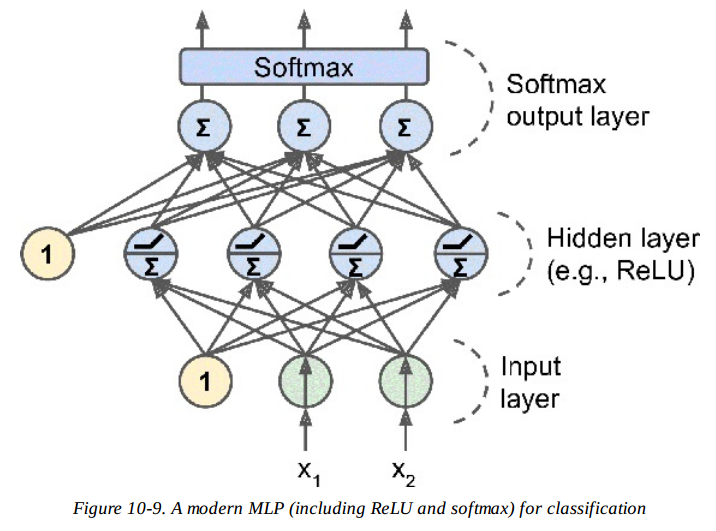

**NOTE**

Biological neurons seem to implement a roughly sigmoid (S-shaped) activation function, so researchers stuck to sigmoid functions for a very long time. But it turns out that the ReLU activation function generally works better in ANNs. This is one of the cases where the biological analogy was misleading.

### Training an MLP with TensorFlow’s High-Level API

The simplest way to train an MLP with TensorFlow is to use the high-level API `TF.Learn`, which offers a Scikit-Learn–compatible API. 

The `DNNClassifier `class makes it fairly easy to train a deep neural network with any number of hidden layers, and a softmax output layer to output estimated class probabilities. For example, the following code trains a `DNN` for classification with two hidden layers (one with 300 neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons:

In [5]:
import tensorflow as tf

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

AttributeError: module 'tensorflow' has no attribute 'contrib'

The code first creates a set of real valued columns from the training set (other types of columns, such as categorical columns, are available). 

Then we create the `DNNClassifier`, and we wrap it in a ScikitLearn compatibility helper.

Finally, we run 40,000 training iterations using batches of 50 instances.

If you run this code on the MNIST dataset (after scaling it, e.g., by using Scikit-Learn’s `StandardScaler`), you will actually get a model that achieves around 98.2% accuracy on the test set!


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

**WARNING**

The `tensorflow.contrib` package contains many useful functions, but it is a place for experimental code that has not yet graduated to be part of the core TensorFlow API. So the `DNNClassifier` class (and any other contrib code) may change without notice in the future.

Under the hood, the `DNNClassifier` class creates all the neuron layers, based on the ReLU activation function (we can change this by setting the `activation_fn` hyperparameter). 

The output layer relies on the softmax function, and the cost function is cross entropy. 

### Training a DNN Using Plain TensorFlow

If you want more control over the architecture of the network, you may prefer to use TensorFlow’s lowerlevel Python API. 

In this section we will build the same model as before using this API, and we will implement *Mini-batch Gradient Descent* to train it on the MNIST dataset.

The first step is the *construction phase*, building the TensorFlow graph. 

The second step is the *execution phase*, where you actually run the graph to train the model.

### Construction Phase

Let’s start. First we need to import the tensorflow library. 

Then we must specify the number of inputs and outputs, and set the number of hidden neurons in each layer:

In [ ]:
import tensorflow as tf
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

You can use placeholder nodes to represent the training data and targets. 

The shape of X is only *partially defined*. We know that it will be a 2D tensor (i.e., a matrix), with instances along the first dimension and features along the second dimension, and we know that the *number of features* is going to be 28 x 28 (one feature per pixel), but we don’t know yet how many instances each training batch will contain. 

So the shape of X is `(None, n_inputs)`. Similarly, we know that `y` will be a 1D tensor with one entry per instance, but again we don’t know the size of the training batch at this point, so the shape is (None).

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

The placeholder `X` will act as the input layer:

During the *execution phase*, it will be replaced with **one training batch** at a time (note that all the instances in a training batch will be processed simultaneously by the neural network). 

Now you need to create the 
* two hidden layers 
* the output layer. 

The two hidden layers are almost identical: they differ only by the *inputs they are connected* to and by *the number of neurons they contain*. 

The output layer is also very similar, but it uses a *softmax activation* function instead of a ReLU activation function. 

Let’s create a `neuron_layer()` function that we will use to create one layer at a time. 

It will need parameters to specify 

* the inputs
* the number of neurons
* the activation function
* the name of the layer

In [ ]:
def neuron_layer(X, n_neurons, name, activation=None):
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Let’s go through this code line by line:
    
1. First we create a *name scope* using the name of the layer: it will contain all the computation nodes for this neuron layer. This is optional, but the graph will look much nicer in TensorBoard if its nodes are well organized.

2. Next, we get the number of inputs by looking up the input matrix’s shape and getting the size of the **second dimension** (the *first dimension is for instances*).

3. The next three lines create a `W` variable that will hold the weights matrix (often called the *layer’s kernel*). A 2D tensor containing all the connection weights between each input and each neuron; hence, its shape will be `(n_inputs, n_neurons)`. It will be initialized randomly, using a *truncated normal (Gaussian) distribution* with a standard deviation of $\frac{2}{\sqrt{n_{inputs}}}$. Using this specific standard deviation helps the algorithm converge much faster; it is one of those small tweaks to neural networks that have had a tremendous impact on their efficiency. 
It is important to initialize connection weights *randomly* for all hidden layers to avoid any symmetries that the Gradient Descent algorithm would be unable to break.

4. The next line creates a `b` variable for biases, initialized to 0 (no symmetry issue in this case), with one bias parameter per neuron.

5. Then we create a subgraph to compute `Z = X · W + b`. This vectorized implementation will efficiently compute the weighted sums of the inputs plus the bias term for each and every neuron in the layer, for all the instances in the batch in just one shot.

6. Finally, if an activation parameter is provided, such as `tf.nn.relu` (i.e., `max (0, Z)`), then the code returns `activation(Z)`, or else it just returns `Z`.

Now you have a nice function to create a neuron layer. 

Let’s use it to create the deep neural network: 
* The first hidden layer takes `X` as its input. 
* The second takes the output of the first hidden layer as its input. 
* The output layer takes the output of the second hidden layer as its input.

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Note that `logits` is the output of the neural network **before** going through the softmax activation function: for optimization reasons, we will handle the softmax computation later.

As you might expect, TensorFlow comes with many handy functions to create standard neural network layers, so **there’s often no need to define your own `neuron_layer()` function like we just did**. 

For example, TensorFlow’s `tf.layers.dense()` function (previously called `tf.contrib.layers.fully_connected()`) creates a *fully connected* layer, where all the inputs are connected to all the neurons in the layer. 

It takes care of creating the weights and biases variables, named kernel and bias respectively, using the appropriate initialization strategy, and you can set the activation function using the `activation` argument. 

It also supports regularization parameters. Let’s tweak the preceding code to use the `dense()` function instead of our `neuron_layer()` function. Simply replace the dnn construction section with the following code:

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

The neural network model ready to go, we need to **define the cost function** that we will use to train it. 

Just as we did for Softmax Regression in Chapter 4, we will use *cross entropy*. 

As we discussed earlier, *cross entropy will penalize models that estimate a low probability for the target class*.

TensorFlow provides several functions to compute cross entropy. We will use `sparse_softmax_cross_entropy_with_logits(`): 

it computes the cross entropy based on the **“logits”** (i.e., **the output of the network before going through the softmax activation function**), and it expects labels in the form of integers ranging from 0 to the number of claslogitsses minus 1 (in our case, from 0 to 9). 

This will give us a 1D tensor containing the cross entropy for *each instance*. We can then use TensorFlow’s `reduce_mean()` function to **compute the mean cross entropy over *all* instances**.

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

NOTE

The `sparse_softmax_cross_entropy_with_logits()` function is equivalent to **applying the softmax activation function and then computing the cross entropy**, but it is more efficient, and it properly takes care of corner cases like `logits` equal to 0. 

This is why *we did not apply the softmax activation function earlier*. There is also another function called `softmax_cross_entropy_with_logits()`, which takes labels in the form of **one-hot vectors** (instead of ints from 0 to the number of classes minus 1).

Now we need to define a `GradientDescentOptimizer` that will tweak the model parameters to minimize the cost function. Nothing new; 

In [ ]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

The last important step in the construction phase is to **specify how to evaluate the model**. We will simply use *accuracy* as our performance measure. 

First, for each instance, determine if the neural network’s prediction is correct by checking whether or not the **highest logit corresponds to the target class**. For this you can use the `in_top_k()` function: 

This returns a 1D tensor full of boolean values, so we need to cast these booleans to floats and then compute the average. This will give us the network’s overall accuracy.

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

And, as usual, we need to create a node to initialize all variables, and we will also create a `Saver` to save our trained model parameters to disk:

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

This was fewer than 40 lines of code: 
* we created placeholders for the inputs and the targets
* we created a function to build a neuron layer, we used it to create the DNN
* we defined the cost function 
* we created an optimizer
* finally we defined the performance measure.

## Execution Phase

First, let’s load MNIST. We could use Scikit-Learn for that as we did in previous chapters, but TensorFlow offers its own helper that 

* fetches the data
* scales it (between 0 and 1)
* shuffles it
* provides a simple function to load one mini-batch a time. So let’s use it instead:

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Now we define the number of epochs that we want to run, as well as the size of the mini-batches:

In [ ]:
n_epochs = 40
batch_size = 50

And now we can train the model:

In [ ]:
with tf.Session() as sess:
    
    init.run()

    for epoch in range(n_epochs):
        
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.linitabels})
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

This code opens a TensorFlow session, and it runs the `init` node that initializes all the variables. 

Then it runs the main training loop: at each epoch, the code iterates through a number of mini-batches that corresponds to the training set size. 

Each mini-batch is fetched via the `next_batch()` method, and then the code simply runs the training operation, feeding it the current mini-batch input data and targets. 

Next, at the end of each epoch, the code evaluates the model on the last mini-batch and on the full test set, and it prints out the result. 

Finally, the model parameters are saved to disk.

## Using the Neural Network

Now that the neural network is trained, you can use it to **make predictions**. To do that, you can reuse the same construction phase, but change the execution phase like this:

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = [...] # some new images (scaled from 0 to 1)
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

First the code loads the model parameters from disk. 

Then it loads some new images that you want to classify. 

Remember to apply the same *feature scaling* as for the training data (in this case, scale it from 0 to 1). 

Then the code evaluates the `logits` node. 

If you wanted to know all the estimated class probabilities, you would need to apply the `softmax()` function to the `logits`, but if you just want to predict a class, you can simply **pick the class that has the highest logit value** (using the `argmax()` function does
the trick).

### Fine-Tuning Neural Network Hyperparameters

The **flexibility** of neural networks is also one of their main drawbacks: 

there are many hyperparameters to tweak. Not only can you use any imaginable **network topology** (how neurons are interconnected), but even in a simple MLP you can change *the number of layers, the number of neurons per layer, the type of
activation function to use in each layer, the weight initialization logic, and much more*. 


How do you know what combination of hyperparameters is the best for your task?

Of course, you can use *grid search with cross-validation* to find the right hyperparameters, like you did in previous chapters, but since there are many hyperparameters to tune, and since training a neural network on a large dataset **takes a lot of time**, you will only be able to explore a tiny part of the hyperparameter space in a reasonable amount of time. 


It is much better to use **randomized search**, as we discussed in Chapter 2. 

Another option is to use a tool such as **Oscar**:

implements more complex algorithms to help you find a good set of hyperparameters quickly.

It helps to have an idea of what values are reasonable for each hyperparameter, so you can *restrict the search space*. 


### Number of Hidden Layers

For many problems, you can just **begin with a single hidden layer** and you will get reasonable results. 

It has actually been shown that *an MLP with just one hidden layer can model even the most complex functions **provided it has enough neurons**.*


For a long time, these facts convinced researchers that there was no need to investigate any deeper neural networks. 

But they overlooked the fact that deep networks have **a much higher parameter efficiency than shallow ones**: 

DNN can model complex functions using **exponentially fewer neurons than shallow nets**, making them much faster to train.

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to use copy/paste. You would have to draw each tree individually, branch per branch, leaf per leaf. If you could instead draw one leaf, copy/paste it to draw a branch, then copy/paste that branch to create a tree, and finally copy/paste this tree to make a forest, you would be finished in no time. 

Realworld data is often **structured in such a hierarchical way and DNNs automatically take advantage of this fact**: 

* lower hidden layers model low-level structures (e.g., line segments of various shapes and
orientations)

* intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles)

* the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs **converge faster** to a good solution, it also **improves their ability to generalize to new datasets**. 

For example, if you have already **trained a model** to recognize faces in pictures, and you now want to train a new neural network to recognize hairstyles, then you can kickstart training by *reusing the lower layers of the first network*. 

Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the value of the weights and biases of the lower layers of the first network. This way the network will **not have to learn from scratch** all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles).

In summary, for **many problems** you can **start with just one or two hidden layers** and it will work just fine (e.g., you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total amount of neurons, in roughly the same amount of training time). 


For more **complex problems**, you can gradually **ramp up the number of hidden layers**, until you ***start overfitting the training set***. 

Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, **but not fully connected ones**), and they need a **huge amount of training data**. 

However, *you will rarely have to train such networks from scratch*: it is much more common to reuse parts of a **pretrained state-of-the-art** network that performs a similar task. Training will be a lot faster and require much less data.

### Number of Neurons per Hidden Layer

Obviously the number of neurons in the *input and output* layers is determined by the type of *input and output your task requires*. For example, the MNIST task requires 28 x 28 = 784 input neurons and 10 output neurons. 


As for the hidden layers, a common practice is to size them to *form a funnel*, with fewer and fewer neurons at each layer — the rationale being that many **low-level features can coalesce into far fewer high-level features**. 

For example, a typical neural network for MNIST may have two hidden layers, the first with 300 neurons and the second with 100. 

However, *this practice is not as common now*, and you may simply **use the same size for all hidden layers** — for example, all hidden layers with 150 neurons: that’s just one hyperparameter to tune instead of one per layer. 

Just like for the number of layers, you can **try increasing the number of neurons gradually until the network starts overfitting**. 

In general you **will get more bang for the buck by increasing the *number of layers* than the *number of neurons per layer***. Unfortunately, as you can see, finding the perfect amount of neurons is still somewhat of a black art.

A simpler approach is to pick a model with more layers and neurons than you actually need, then use **early stopping to prevent it from overfitting** (and other regularization techniques, especially **dropout**). 

This has been dubbed the **stretch pants** approach:

Instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size.

### Activation Functions

]n most cases you can use the **ReLU activation** function in the *hidden layers*. 

It is **a bit faster** to compute than other activation functions, and Gradient Descent
does not get stuck as much on plateaus, thanks to the fact that **it does not saturate for large input values** (as opposed to the logistic function or the hyperbolic tangent function, which saturate at 1).

For the **output layer**, the *softmax activation* function is generally a good choice for *classification tasks* (when the classes are mutually exclusive). 

For **regression** tasks, you can simply use **no activation function at all**.

Exercises
1. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A B (where represents the XOR operation). Hint: A B = (A ¬ B) (¬ A B).

2. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

3. Why was the logistic activation function a key ingredient in training the first MLPs?

4. Name three popular activation functions. Can you draw them?

5. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function. What is the shape of the input matrix X? What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector b h? What is the shape of the output layer’s weight vector Wo, and its bias vector bo? What is the shape of the network’s output matrix Y? Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and b o.

6. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.

7. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

8. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

9. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of Chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

Solutions to these exercises are available in Appendix A.